In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats, special
import statistics
from statistics import multimode

# Teil I - Beschreibende Statistik

In [29]:
# A 2.1
# data = [8, 7, 5 ,10, 6, 3, 9, 7]

# A 2.3
data = [5, 7, 4, 25]

## 01. Charakterisierung einer Stichprobe

### 01.1 Häufigkeitsverteilung einer Stichprobe

Länge 4
Verschiedene Werte [ 4  5  7 25]
Absolute Häufigkeiten [ 4  5  7 25] [1 1 1 1]
Relative Häufigkeiten [0.25 0.25 0.25 0.25]


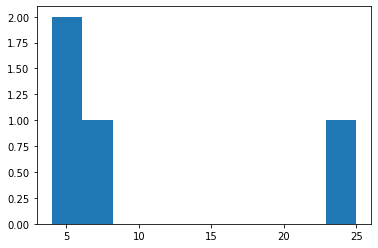

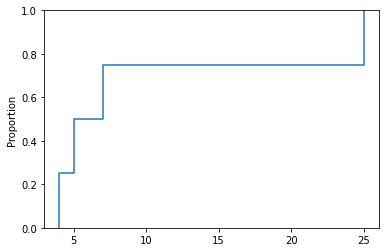

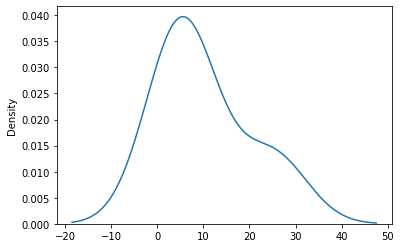

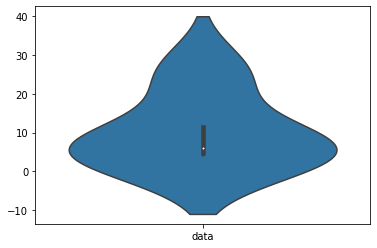

In [30]:
print('Länge', len(data))
print('Verschiedene Werte', np.unique(data))

# Häufigkeiten
data_unique, data_unique_counts = np.unique(data, return_counts=True)
print('Absolute Häufigkeiten', data_unique, data_unique_counts)
print('Relative Häufigkeiten', data_unique_counts / len(data))

# Histogramm
plt.hist(data)
plt.show()

# Verteilungsfunktion (CDF)
sns.ecdfplot(data)
plt.show()

# Kernel Density Estimation (KDE)
sns.kdeplot(data)
plt.show()

# Violinplot
df = pd.DataFrame({'data': pd.Series(data, dtype='int'), 'art': pd.Series(['a', 'b', 'a', 'c', 'd', 'a', 'd', 'c', 'c', 'a'], dtype='category')})
sns.violinplot(data=df)
plt.show()

### 01.2 Kennwerte einer Stichprobe

In [31]:
print('data', data)
print('Arithmetisches Mittel', np.mean(data))
print('Median', np.median(data))
print('Modalwert(e) =', multimode(data))
print('25% Quantil', np.quantile(data, q=0.25, method='midpoint'))
print('50% Quantil', np.quantile(data, q=0.50, method='midpoint'))
print('75% Quantil', np.quantile(data, q=0.75, method='midpoint'))
print('62,5% Quantil', np.quantile(data, q=0.625, method='midpoint'))
print('95% Quantil', np.quantile(data, q=0.95, method='midpoint'))
print('Empirische Varianz', np.var(data, ddof=1))
print('Empirische Standardabweichung', np.std(data, ddof=1))
print('Spannweite', max(data) - min(data))
print('Interquartilabstand', stats.iqr(data))
print('Empirische Schiefe', stats.skew(data))
print('Empirische Wölbung', stats.kurtosis(data))

data [5, 7, 4, 25]
Arithmetisches Mittel 10.25
Median 6.0
Modalwert(e) = [5, 7, 4, 25]
25% Quantil 4.5
50% Quantil 6.0
75% Quantil 16.0
62,5% Quantil 6.0
95% Quantil 16.0
Empirische Varianz 98.25
Empirische Standardabweichung 9.912113800799505
Spannweite 21
Interquartilabstand 6.75
Empirische Schiefe 1.1010597857395847
Empirische Wölbung -0.7103143000817962


## 02. Lineare Korrelation und Regression

In [13]:
data_b = [55, 60, 40, 70, 45, 40, 65, 55]
data_c = [3, 10, 9, 1, 5, 10, 2, 3]

### 02.1 Lineare Korrelation

Korrelationskoeffizient 
 [[1.         0.93076495]
 [0.93076495 1.        ]]
Kovarianz 
 [[  4.98214286  23.39285714]
 [ 23.39285714 126.78571429]]


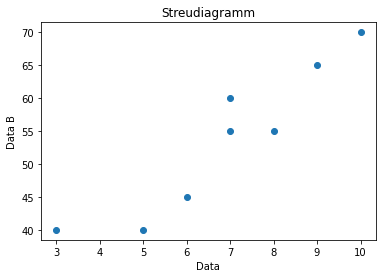

[Text(0.5, 1.0, 'Korrelationsmatrix')]

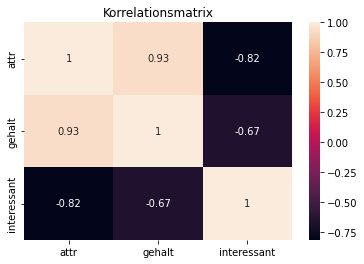

In [28]:
print('Korrelationskoeffizient \n', np.corrcoef(data, data_b))
print('Kovarianz \n', np.cov(data, data_b))

# Streudiagramm
fig, ax = plt.subplots() 
plt.plot(data, data_b, 'o') 
ax.set_title('Streudiagramm')
ax.set_xlabel('Data') 
ax.set_ylabel('Data B') 
plt.show()

# Korrelations Heatmap
df_corr = pd.DataFrame({'attr': pd.Series(data), 'gehalt': pd.Series(data_b), 'interessant': pd.Series(data_c)})
corr = df_corr.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True).set(title='Korrelationsmatrix')

### 02.2 Lineare Regression

Regressionsgerade 
 LinregressResult(slope=4.695340501792114, intercept=21.469534050179213, rvalue=0.9307649479642144, pvalue=0.0007872078714410112, stderr=0.752972580960035, intercept_stderr=5.410148603213867)


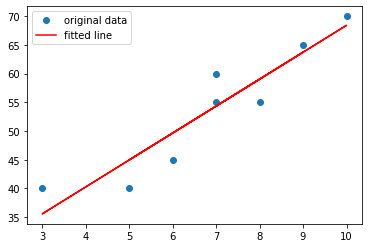

In [15]:
print('Regressionsgerade \n', stats.linregress(data, data_b))

# Regressionsgerade in Streudiagramm
reg = stats.linregress(data, data_b) 
plt.plot(data, data_b, 'o', label='original data') 
plt.plot(data, reg.intercept + reg.slope * np.asarray(data), 'r', label='fitted line') 
plt.legend() 
plt.show()

# Teil II - Diskrete Wahrscheinlichkeitstheorie

## 01. Wahrscheinlichkeitsrechnung

In [16]:
k = 2
n = 7

### 01.1 Kombinatorik

![](./assets/kombinatorik.png)

In [17]:
print('Permutation (ohne Wiederholung) =', special.factorial(n, exact=True))
print('Variation (ohne Wiederholung) =', special.perm(n, k, exact=True))
print('Variationen (mit Wiederholung) =', pow(n, k))
print('Kombination (ohne Wiederholung) =', special.comb(n, k, repetition=False, exact=True))
print('Kombination (mit Wiederholung) =', special.comb(n, k, repetition=True, exact=True))

Permutation (ohne Wiederholung) = 5040
Variation (ohne Wiederholung) = 42
Variationen (mit Wiederholung) = 49
Kombination (ohne Wiederholung) = 21
Kombination (mit Wiederholung) = 28


## 02. Zufallsvariablen

In [18]:
# Zur Demonstration wird ein Würfel mit acht Seiten 
# und folgender Verteilung der Zahlen verwendet:
X = [1,1,1,1,2,3,3,3]

Träger / Wertemenge [1. 2. 3.]
Relative Verteilung [0.5   0.125 0.375]
Absolute Verteilung [4. 1. 3.]


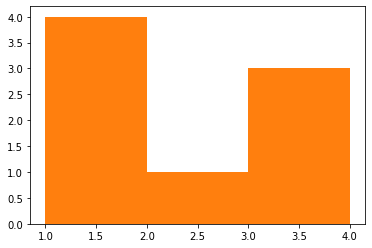

Verteilungsfunktion [0.5   0.625 1.   ]
Erwartungswert 1.875
Varianz 0.859375
Standardabweichung 0.9270248108869579


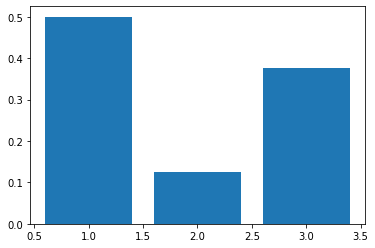

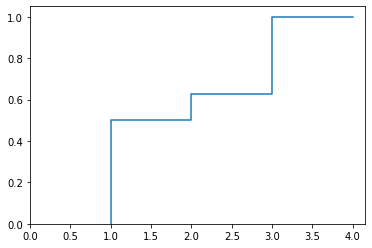

In [19]:
# Träger / Wertemenge
T = np.linspace(1, 3, 3)
print('Träger / Wertemenge', T)

# Verteilung
p, _, _ = plt.hist(X, np.linspace(1,4,4), density=True)
n, _, _ = plt.hist(X, np.linspace(1,4,4), density=False)
print('Relative Verteilung', p)
print('Absolute Verteilung', n)
plt.show()

print('Verteilungsfunktion', np.cumsum(p))
print('Erwartungswert', np.sum(T * p))
print('Varianz', np.var(X, ddof=0))
print('Standardabweichung', np.std(X, ddof=0))

# Verteilung zeichnen
plt.bar(T, p)
plt.show()

# Verteilungsfunktion zeichnen
y = np.concatenate((np.array([0]), np.cumsum(p)))
plt.step(np.linspace(1,4,4), y)
plt.xlim(0)
plt.ylim(0)
plt.show()


## 03. Wichtige diskrete Verteilungen

### 03.1 Bernoulli-Verteilung

#### Definition

![](./assets/bernoulli01.png)
![](./assets/bernoulli02.png)

#### Code

In [20]:
p = 0.7

print('Verteilung')
print('P(X = 0) =', stats.bernoulli(p).pmf(0))
print('P(X = 1) =', stats.bernoulli(p).pmf(1))

print('Verteilungsfunktion')
print('P(X <= -1) =', stats.bernoulli(p).cdf(-1))
print('P(X <= 0) =', stats.bernoulli(p).cdf(0))
print('P(X <= 1) =', stats.bernoulli(p).cdf(1))

print('Erwartungswert', stats.bernoulli(p).expect())
print('Varianz', stats.bernoulli(p).var())

Verteilung
P(X = 0) = 0.30000000000000004
P(X = 1) = 0.7
Verteilungsfunktion
P(X <= -1) = 0.0
P(X <= 0) = 0.30000000000000004
P(X <= 1) = 1.0
Erwartungswert 0.7
Varianz 0.21000000000000002


### 03.2 Geometrische Verteilung

#### Definition

![](./assets/geom01.png)
![](./assets/geom02.png)

#### Code

In [37]:
p = 0.34

print('Verteilung')
print('P(X = 0) =', stats.geom(p).pmf(0))
print('P(X = 1) =', stats.geom(p).pmf(1))
print('P(X = 2) =', stats.geom(p).pmf(2))

print('Verteilungsfunktion')
print('P(X <= 0) =', stats.geom(p).cdf(0))
print('P(X <= 1) =', stats.geom(p).cdf(1))
print('P(X <= 2) =', stats.geom(p).cdf(2))
print('P(X <= 3) =', stats.geom(p).cdf(3))

print('Erwartungswert', stats.geom(p).expect())
print('Varianz', stats.geom(p).var())

Verteilung
P(X = 0) = 0.0
P(X = 1) = 0.34
P(X = 2) = 0.2244
Verteilungsfunktion
P(X <= 0) = 0.0
P(X <= 1) = 0.34
P(X <= 2) = 0.5644
P(X <= 3) = 0.712504
Erwartungswert 2.9411764705882337
Varianz 5.709342560553631


### 03.3 Binomialverteilung

#### Definition

![](./assets/binom01.png)
![](./assets/binom02.png)

#### Code

In [41]:
n = 34
p = 0.34

print('Verteilung')
print('P(X = 4) =', stats.binom(n, p).pmf(4))
print('P(X = 5) =', stats.binom(n, p).pmf(5))

print('Verteilungsfunktion')
print('P(4 <= X <= 5) =', stats.binom(n, p).cdf(5) - stats.binom(n, p).cdf(3))

print('Erwartungswert', stats.binom(n, p).expect())
print('Varianz', stats.binom(n, p).var())

Verteilung
P(X = 4) = 0.0023907106806538227
P(X = 5) = 0.00738946937656636
Verteilungsfunktion
P(4 <= X <= 5) = 0.009780180057220157
Erwartungswert 11.559999999999995
Varianz 7.629599999999999


### 03.4 Hypergeometrische Verteilung

#### Definition

![](./assets/hypergeom01.png)
![](./assets/hypergeom02.png)

#### Code

In [42]:
n = 10
N = 130
M = 20

print('Verteilung')
print('P(X >= 1) =', 1 - stats.hypergeom(N, M, n).pmf(0))

print('Verteilungsfunktion')
print('P(X <= 5) =', stats.hypergeom(N, M, n).cdf(5))

print('Erwartungswert', stats.hypergeom(N, M, n).expect())
print('Varianz', stats.hypergeom(N, M, n).var())

Verteilung
P(X >= 1) = 0.8239586537014251
Verteilungsfunktion
P(X <= 5) = 0.9990943253545669
Erwartungswert 1.5384615384615383
Varianz 1.2109536259804596


### 03.5 Poissonverteilung

#### Definition

![](./assets/poisson01.png)
![](./assets/poisson02.png)

#### Code

In [36]:
l = 6

print('Verteilung')
print('P(X >= 1) =', 1 - stats.poisson(l).pmf(0))

print('Verteilungsfunktion')
print('P(X <= 1) =', stats.poisson(l).cdf(1))

print('Erwartungswert', stats.poisson(l).expect())
print('Varianz', stats.poisson(l).var())

Verteilung
P(X >= 1) = 0.9975212478233336
Verteilungsfunktion
P(X <= 1) = 0.01735126523666451
Erwartungswert 5.9999999999999964
Varianz 6.0


# Teil III - Kontinuierliche Wahrscheinlichkeitstheorie

## 01. Wichtige stetige Verteilungen

### 01.1 Gleichverteilung

#### Definition

![](./assets/gleich01.png)
![](./assets/gleich02.png)

#### Code

In [25]:
a = 2
b = 10

print('Verteilungsdichte')
print('f(0) =', stats.uniform(a,b-a).pdf(0))
print('f(2) =', stats.uniform(a,b-a).pdf(2))
print('f(6) =', stats.uniform(a,b-a).pdf(6.3123))
print('f(10) =', stats.uniform(a,b-a).pdf(10))
print('f(12) =', stats.uniform(a,b-a).pdf(12))

print('Verteilungsfunktion')
print('P(X <= 0) =', stats.uniform(a,b-a).cdf(0))
print('P(X <= 2) =', stats.uniform(a,b-a).cdf(2))
print('P(X <= 5) =', stats.uniform(a,b-a).cdf(5))
print('P(X <= 7) =', stats.uniform(a,b-a).cdf(7))
print('P(X <= 10) =', stats.uniform(a,b-a).cdf(10))

print('p-Quantil')
print('10% Quantil', stats.uniform(a,b-a).ppf(0.1))
print('75% Quantil', stats.uniform(a,b-a).ppf(0.75))
print('100% Quantil', stats.uniform(a,b-a).ppf(1.0))

print('Erwartungswert', stats.uniform(a,b-a).expect())
print('Varianz', stats.uniform(a,b-a).var())

Verteilungsdichte
f(0) = 0.0
f(2) = 0.125
f(6) = 0.125
f(10) = 0.125
f(12) = 0.0
Verteilungsfunktion
P(X <= 0) = 0.0
P(X <= 2) = 0.0
P(X <= 5) = 0.375
P(X <= 7) = 0.625
P(X <= 10) = 1.0
p-Quantil
10% Quantil 2.8
75% Quantil 8.0
100% Quantil 10.0
Erwartungswert 6.0
Varianz 5.333333333333333


### 01.2 Exponentialverteilung

#### Definition

![](./assets/expon01.png)
![](./assets/expon02.png)

#### Code

In [26]:
l = 5

print('Verteilungsdichte')
print('f(0) =', stats.expon(scale=1/l).pdf(0))
print('f(0.5) =', stats.expon(scale=1/l).pdf(0.5))
print('f(1) =', stats.expon(scale=1/l).pdf(1))

print('Verteilungsfunktion')
print('P(X <= 0) =', stats.expon(scale=1/l).cdf(0))
print('P(X <= 0.5) =', stats.expon(scale=1/l).cdf(0.5))
print('P(X <= 1) =', stats.expon(scale=1/l).cdf(1))
print('P(X <= 10) =', stats.expon(scale=1/l).cdf(10))

print('p-Quantil')
print('10% Quantil', stats.expon(scale=1/l).ppf(0.1))
print('75% Quantil', stats.expon(scale=1/l).ppf(0.75))
print('100% Quantil', stats.expon(scale=1/l).ppf(1.0))

print('Erwartungswert', stats.expon(scale=1/l).expect())
print('Varianz', stats.expon(scale=1/l).var())

Verteilungsdichte
f(0) = 5.0
f(0.5) = 0.410424993119494
f(1) = 0.03368973499542733
Verteilungsfunktion
P(X <= 0) = 0.0
P(X <= 0.5) = 0.9179150013761012
P(X <= 1) = 0.9932620530009145
P(X <= 10) = 1.0
p-Quantil
10% Quantil 0.021072103131565264
75% Quantil 0.2772588722239781
100% Quantil inf
Erwartungswert 0.2000000000000003
Varianz 0.04000000000000001


### 01.3 Normalverteilung

#### Definition

![](./assets/norm01.png)
![](./assets/norm02.png)
![](./assets/norm03.png)

#### Code

In [27]:
mu = 1
sigma = 2

print('Verteilungsdichte')
print('f(0) =', stats.norm(mu, sigma).pdf(0))
print('f(1) =', stats.norm(mu, sigma).pdf(1))
print('f(2) =', stats.norm(mu, sigma).pdf(2))

print('Verteilungsfunktion')
print('f(0) =', stats.norm(mu, sigma).cdf(0))
print('f(1) =', stats.norm(mu, sigma).cdf(1))
print('f(2) =', stats.norm(mu, sigma).cdf(2))

print('p-Quantil')
print('10% Quantil', stats.norm(mu, sigma).ppf(0.1))
print('25% Quantil', stats.norm(mu, sigma).ppf(0.25))
print('50% Quantil', stats.norm(mu, sigma).ppf(0.5))
print('75% Quantil', stats.norm(mu, sigma).ppf(0.75))
print('100% Quantil', stats.norm(mu, sigma).ppf(1.0))

print('Erwartungswert', stats.norm(mu, sigma).expect())
print('Varianz', stats.norm(mu, sigma).var())

Verteilungsdichte
f(0) = 0.17603266338214976
f(1) = 0.19947114020071635
f(2) = 0.17603266338214976
Verteilungsfunktion
f(0) = 0.3085375387259869
f(1) = 0.5
f(2) = 0.6914624612740131
p-Quantil
10% Quantil -1.5631031310892007
25% Quantil -0.3489795003921634
50% Quantil 1.0
75% Quantil 2.348979500392163
100% Quantil inf
Erwartungswert 0.9999999999999999
Varianz 4.0
